---
# 1. Perkenalan

Nama : Adnan Rio

Batch : FTDS-014

Dataset : heart-failure

## Objective : 

Mengevaluasi konsep Ensemble Learning sebagai berikut:t:

-  Mampu memperoleh data menggunakan BigQuery
-  Mampu memahami konsep Classification dengan Ensemble Learning.
-  Mampu mengimplementasikan Ensemble Learning untuk membuat prediksi.
-  Mampu memahami konsep salah satu algoritma boosting dan mengimplementasikannya dalam kasus Supervised Learning

### 1a. SQL Query

SELECT * from `ftds-hacktiv8-project`.`phase1_ftds_014`.`heart-failure`

---
# 2. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [70]:
#Kolom import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import warnings


---
# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dl

In [71]:
#Data Loading from census_adult_income.csv
df = pd.read_csv('h8dsft_P1G3_adnan_rio.csv')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [72]:
#show tail data
df.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [73]:
# copy df untuk menjaga data asli
df_copy = df.copy()

In [74]:
# melihat persebaran data df, dan mengetahui masing-masing kolom di dalam df
df_copy.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [75]:
# melihat null vs non-null data df, untuk mengetahui missing value 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Tidak ada null data. Lanjutkan ke EDA untuk melihat isi data.

Namun sebelum itu lakukan rename anaemia dan DEATH_EVENT agar lebih mudah dalam melakukan analisa. 

In [76]:
df_copy.rename(columns = {'anaemia':'anemia','DEATH_EVENT':'death_event'}, inplace = True)

---
# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, heatmap, central tendency dan lain sebagainya.

Target : death_event

In [77]:
#melihat unique value padatarget (default_payment_next_month)
df_copy.death_event.unique()

array([1, 0], dtype=int64)

In [78]:
#copy df untuk EDA
df_copy_EDA = df_copy.copy()

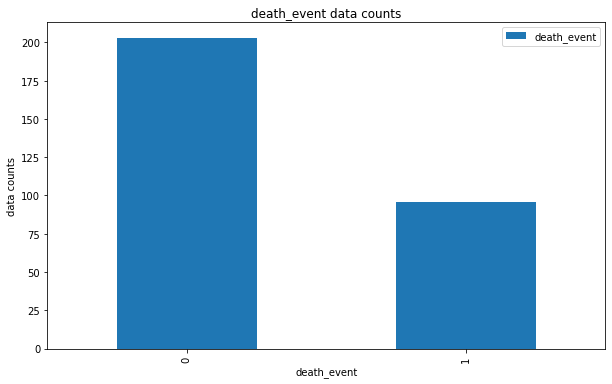

In [79]:
#groupby "death_event
df_copy_EDA.groupby(["death_event"])[["death_event"]].count().plot(kind='bar', figsize=(10, 6))
plt.xlabel('death_event') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('death_event data counts') # add title to the plot

plt.show()

Terjadi data imbalance pada kategori death_event, sehingga ada kemungkinan model kurang mempelajari kategori ke 1 (death_event = 1) dan mengalami kesulitan dalam melakukan predict.

In [80]:
#membuat def perhitungan proportion, sebelum memasukkannya ke grafik
def make_dataplot_proportion(df3,grdf):
    col3 = []
    for i in df3.loc[:,0]:

        try:
            k = pd.Series.item(grdf.loc[i,0])
        except KeyError:
            k = 0
        
        try:
            b = pd.Series.item(grdf.loc[i,1])
        except KeyError:
            b=0

        try:
            col3.append(b/(b+k))
        except ZeroDivisionError:
            col3.append(0)
        
    df3['proportion'] = col3
    pd.DataFrame(df3)

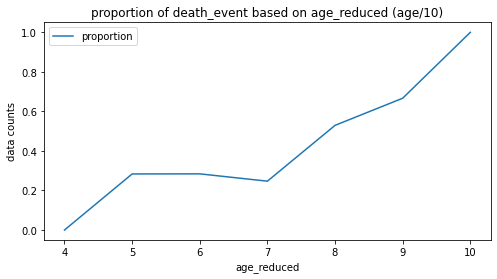

In [81]:
#membentuk class lain yang lebih sederhana
df_copy_EDA['age_reduced'] = np.ceil(df_copy_EDA['age']/10)

#hitung proportion berdasarkan variable
variable = 'age_reduced'
group = 'death_event'
dataunique= pd.DataFrame(df_copy_EDA[variable].unique())
gruopeddf = df_copy_EDA.groupby([variable,group])[[group]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : variable}, inplace=True)
dataunique = dataunique.sort_values(by=variable, ascending=True)
dataunique.set_index(variable, inplace=True)

dataunique.plot(kind='line', figsize=(8, 4))
plt.xlabel(variable) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('proportion of '+ group + ' based on ' + variable + ' (age/10)') # add title to the plot
plt.show()

Grafik diatas telah dikategorikan kembali kepada kategori yang telah di reduced per 10 tahun sehingga data lebih terlihat polanya, pada grafik sangat terlihat proporsi death event = 1 meningkat seiring pertambahan umur terlihat seperti yang di grafik. Keadaan aktual juga mendukung data ini dimana ekspektasi umur hidup mencapai 70 tahun sehingga dapat mendukung grafil dimana death event mulai naik ketika melewati umur 70 tahun.

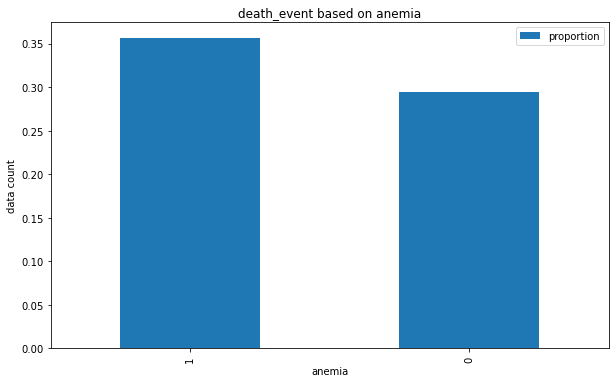

In [82]:
#hitung proportion berdasarkan variable
variable = 'anemia'
group = 'death_event'
dataunique= pd.DataFrame(df_copy_EDA[variable].unique())
gruopeddf = df_copy_EDA.groupby([variable,group])[[group]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : variable}, inplace=True)
dataunique.set_index(variable, inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel(variable) # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( group +' based on ' + variable) # add title to the plot

plt.show()

Proporsi death event tidak ada bedanya antara ada atau tidaknya riwayat anemia. Sehingga anemia tidak mempengaruhi death event.

In [83]:
#membentuk class lain yang lebih sederhana
df_copy_EDA['cp_reduced'] = np.ceil(df_copy_EDA['creatinine_phosphokinase']/1000)

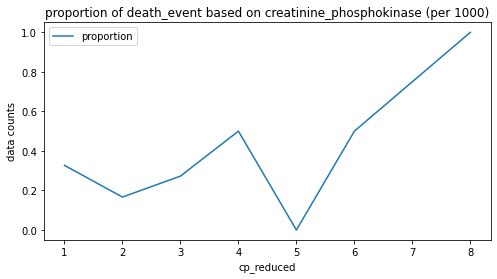

In [84]:
#hitung proportion berdasarkan variable
variable = 'cp_reduced'
group = 'death_event'
dataunique= pd.DataFrame(df_copy_EDA[variable].unique())
gruopeddf = df_copy_EDA.groupby([variable,group])[[group]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : variable}, inplace=True)
dataunique = dataunique.sort_values(by=variable, ascending=True)
dataunique.set_index(variable, inplace=True)

dataunique.plot(kind='line', figsize=(8, 4))
plt.xlabel(variable) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('proportion of '+ group + ' based on creatinine_phosphokinase (per 1000)' ) # add title to the plot
plt.show()

Grafik diatas telah dikategorikan kembali kedalam kategori yang telah di reduced per 1000 sehingga data lebih terlihat polanya, pada grafik sangat terlihat proporsi death event = 1 meningkat seiring pertambahan creatinine_phosphokinase terlihat seperti yang di grafik. creatinine_phosphokinase mempengaruhi death_event.

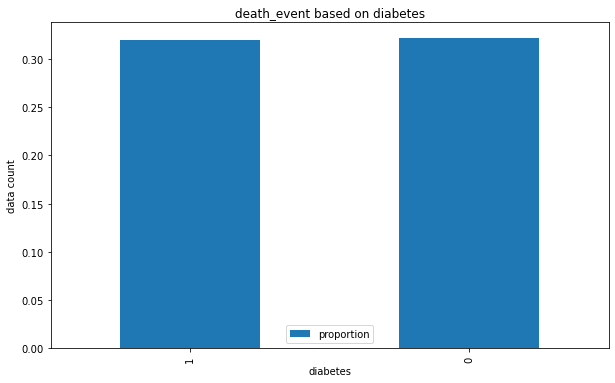

In [85]:
#hitung proportion berdasarkan variable
variable = 'diabetes'
group = 'death_event'
dataunique= pd.DataFrame(df_copy_EDA[variable].unique())
gruopeddf = df_copy_EDA.groupby([variable,group])[[group]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : variable}, inplace=True)
dataunique.set_index(variable, inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel(variable) # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( group +' based on ' + variable) # add title to the plot

plt.show()

Proporsi death event antara ada atau tidaknya riwayat diabetes tidak ada bedanya. Sehingga disimpulkan diabetes tidak mempengaruhi death event.

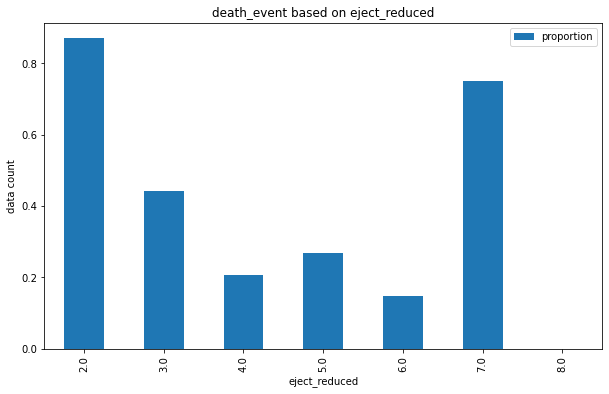

In [86]:
#membentuk class lain yang lebih sederhana
df_copy_EDA['eject_reduced'] = np.ceil(df_copy_EDA['ejection_fraction']/10)

#hitung proportion berdasarkan variable
variable = 'eject_reduced'
group = 'death_event'
dataunique= pd.DataFrame(df_copy_EDA[variable].unique())
gruopeddf = df_copy_EDA.groupby([variable,group])[[group]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : variable}, inplace=True)
dataunique = dataunique.sort_values(by=variable, ascending=True)
dataunique.set_index(variable, inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel(variable) # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( group +' based on ' + variable) # add title to the plot

plt.show()

Grafik diatas telah dikategorikan kembali kedalam kategori yang telah di reduced per 10 sehingga data lebih terlihat polanya, proporsi death event pada setiap kategori 'ejection_fraction' terdapat perbedaan terutama pada 2.0,3.0 dan 7.0. Sehingga disimpulkan ejection_fraction mempengaruhi death event.

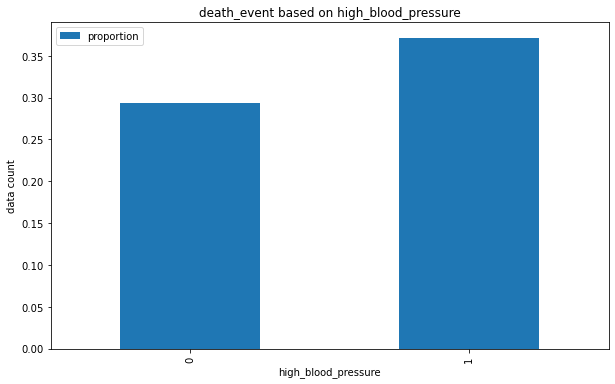

In [87]:
#hitung proportion berdasarkan variable
variable = 'high_blood_pressure'
group = 'death_event'
dataunique= pd.DataFrame(df_copy_EDA[variable].unique())
gruopeddf = df_copy_EDA.groupby([variable,group])[[group]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : variable}, inplace=True)
dataunique.set_index(variable, inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel(variable) # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( group + ' based on ' + variable) # add title to the plot

plt.show()

Grafik diatas menunjukkan proporsi death event pada setiap kategori high_blood_pressure tidak terdapat perbedaan yang signifikan. Sehingga disimpulkan high_blood_pressure tidak mempengaruhi death event.

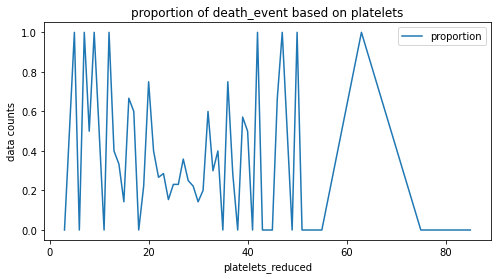

In [88]:
#membentuk class lain yang lebih sederhana
df_copy_EDA['platelets_reduced'] = np.ceil(df_copy_EDA['platelets']/10000)

#hitung proportion berdasarkan variable
variable = 'platelets_reduced'
group = 'death_event'
dataunique= pd.DataFrame(df_copy_EDA[variable].unique())
gruopeddf = df_copy_EDA.groupby([variable,group])[[group]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : variable}, inplace=True)
dataunique = dataunique.sort_values(by=variable, ascending=True)
dataunique.set_index(variable, inplace=True)

dataunique.plot(kind='line', figsize=(8, 4))
plt.xlabel(variable) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('proportion of '+ group + ' based on platelets' ) # add title to the plot
plt.show()

Grafik diatas telah dikategorikan kembali kedalam kategori yang telah di reduced per 10000 sehingga data lebih terlihat polanya. Grafik ini menunjukkan proporsi death event pada setiap kategori platelets terdapat perbedaan yang signifikan, dat amenunjukkan death event rendah pada range 20-40. Sehingga disimpulkan platelets mempengaruhi death event.

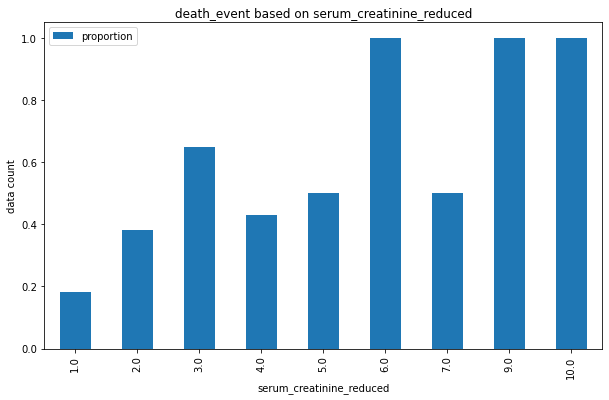

In [89]:
#membentuk class lain yang lebih sederhana
df_copy_EDA['serum_creatinine_reduced'] = np.ceil(df_copy_EDA['serum_creatinine'])

#hitung proportion berdasarkan variable
variable = 'serum_creatinine_reduced'
group = 'death_event'
dataunique= pd.DataFrame(df_copy_EDA[variable].unique())
gruopeddf = df_copy_EDA.groupby([variable,group])[[group]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : variable}, inplace=True)
dataunique = dataunique.sort_values(by=variable, ascending=True)
dataunique.set_index(variable, inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel(variable) # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( group + ' based on ' + variable) # add title to the plot

plt.show()

Grafik diatas telah dikategorikan kembali kedalam kategori setiap angka yang telah di bulatkan keatas sehingga data lebih terlihat polanya. Grafik ini menunjukkan proporsi death event pada setiap kategori serum_creatinine terdapat perbedaan yang signifikan, data menunjukkan kenaikan death event seiring peningkatan serum_creatinine. Sehingga disimpulkan serum_creatinine mempengaruhi death event.

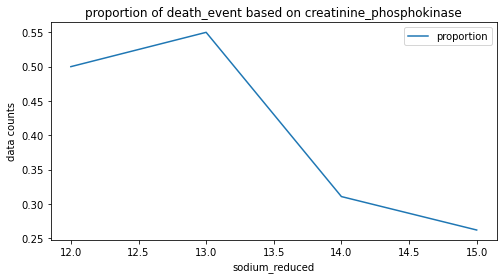

In [90]:
#membentuk class lain yang lebih sederhana
df_copy_EDA['sodium_reduced'] = np.ceil(df_copy_EDA['serum_sodium']/10)

#hitung proportion berdasarkan variable
variable = 'sodium_reduced'
group = 'death_event'
dataunique= pd.DataFrame(df_copy_EDA[variable].unique())
gruopeddf = df_copy_EDA.groupby([variable,group])[[group]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : variable}, inplace=True)
dataunique = dataunique.sort_values(by=variable, ascending=True)
dataunique.set_index(variable, inplace=True)

dataunique.plot(kind='line', figsize=(8, 4))
plt.xlabel(variable) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('proportion of '+ group + ' based on creatinine_phosphokinase' ) # add title to the plot
plt.show()

Grafik diatas telah dikategorikan kembali kedalam kategori setiap angka yang telah di bulatkan keatas setelah dibagi 10 sehingga data lebih terlihat polanya. Grafik ini menunjukkan proporsi death event pada setiap kategori serum_sodium terdapat perbedaan yang signifikan, data menunjukkan penurunan death event seiring peningkatan serum_sodium. Sehingga disimpulkanserum_sodium mempengaruhi death event.

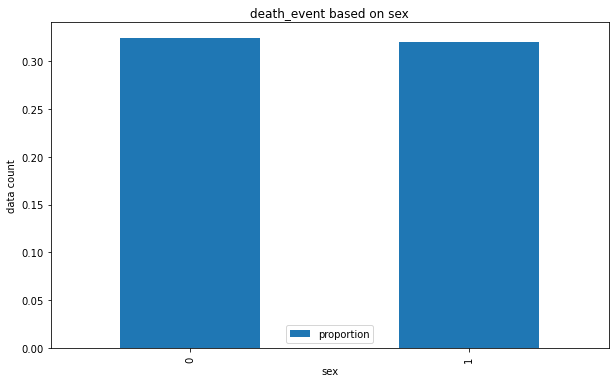

In [91]:
#hitung proportion berdasarkan variable
variable = 'sex'
group = 'death_event'
dataunique= pd.DataFrame(df_copy_EDA[variable].unique())
gruopeddf = df_copy_EDA.groupby([variable,group])[[group]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : variable}, inplace=True)
dataunique = dataunique.sort_values(by=variable, ascending=True)
dataunique.set_index(variable, inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel(variable) # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( group + ' based on ' + variable) # add title to the plot

plt.show()

Grafik diatas menunjukkan proporsi death event pada setiap kategori sex(gender) tidak terdapat perbedaan yang signifikan. Sehingga disimpulkan sex(gender) tidak mempengaruhi death event.

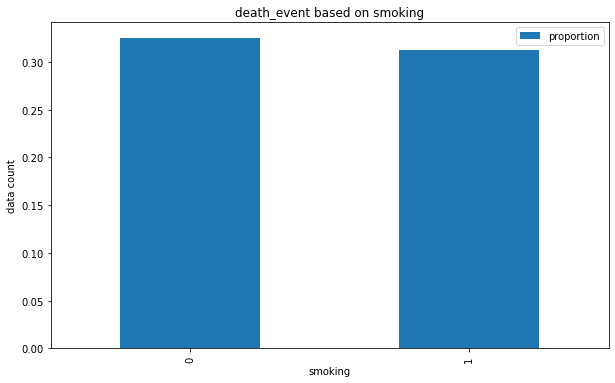

In [92]:
#hitung proportion berdasarkan variable
variable = 'smoking'
group = 'death_event'
dataunique= pd.DataFrame(df_copy_EDA[variable].unique())
gruopeddf = df_copy_EDA.groupby([variable,group])[[group]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : variable}, inplace=True)
dataunique = dataunique.sort_values(by=variable, ascending=True)
dataunique.set_index(variable, inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel(variable) # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( group + ' based on ' + variable) # add title to the plot

plt.show()

Grafik diatas menunjukkan proporsi death event pada setiap kategori antara peserta yang merokok atau tidak ternyata tidak terdapat perbedaan yang signifikan. Sehingga disimpulkan smoking tidak mempengaruhi death event.

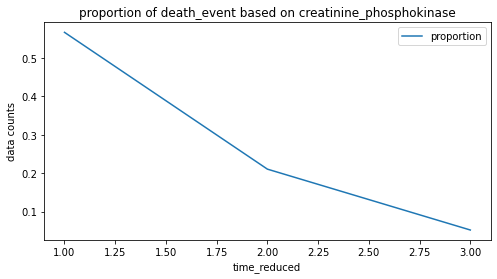

In [93]:
#membentuk class lain yang lebih sederhana
df_copy_EDA['time_reduced'] = np.ceil(df_copy_EDA['time']/100)

#hitung proportion berdasarkan variable
variable = 'time_reduced'
group = 'death_event'
dataunique= pd.DataFrame(df_copy_EDA[variable].unique())
gruopeddf = df_copy_EDA.groupby([variable,group])[[group]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : variable}, inplace=True)
dataunique = dataunique.sort_values(by=variable, ascending=True)
dataunique.set_index(variable, inplace=True)

dataunique.plot(kind='line', figsize=(8, 4))
plt.xlabel(variable) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('proportion of '+ group + ' based on creatinine_phosphokinase' ) # add title to the plot
plt.show()

Grafik diatas telah dikategorikan kembali kedalam kategori setiap angka yang telah di bulatkan keatas setelah dibagi 10 sehingga data lebih terlihat polanya. Grafik ini menunjukkan proporsi death event pada setiap kategori serum_sodium terdapat perbedaan yang signifikan, data menunjukkan penurunan death event seiring peningkatan serum_sodium. Sehingga disimpulkanserum_sodium mempengaruhi death event.

---
# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [94]:
#Get data inference sebanyak 20 row sample dan lock randomize.
df_inf = df_copy.sample(20, random_state = 15)
df_inf.shape

(20, 13)

In [95]:
# Hapus data yang dipakai oleh data inference dari df
df_trts = df_copy.drop(df_inf.index)

# Cek ukuran dataset untuk train dan test, telah berkurang 20 row dari 299:
df_trts.shape

(279, 13)

In [96]:
# Reset index dari kedua dataframe inference dan data untuk train & test
df_inf.reset_index(drop = True, inplace=True)
df_trts.reset_index(drop = True, inplace=True)

## Splitting Dataset, y-X and train-test

In [97]:
#Splitting dataset X adalah feature dan y adalah target
X = df_trts.drop('death_event', axis = 1)
y = df_trts['death_event']

In [98]:
#Splitting dataset menjadi 80% untuk train dan 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [99]:
#Cek ukuran dataset train dan test untuk memastikan proporsi
print('Train set size: ', X_train.shape)
print('Test set size: ', X_test.shape)

Train set size:  (223, 12)
Test set size:  (56, 12)


## Feature Selection

Feature Selection dilakukan sebelum data preprocessing untuk mempersempit cakupan preprocessing data sehingga dapat mengurangi waktu pengolahan data dan menghindari mengolah data yang pada akhirnya tidak terpakai.

In [100]:
#Display X_train to see the features
X_train.head()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
254,72.0,0,127,1,50,1,218000.0,1.0,134,1,0,33
129,68.0,1,646,0,25,0,305000.0,2.1,130,1,0,108
36,55.0,0,582,1,35,1,371000.0,0.7,140,0,0,197
164,70.0,1,75,0,35,0,223000.0,2.7,138,1,1,54
187,40.0,0,624,0,35,0,301000.0,1.0,142,1,1,214


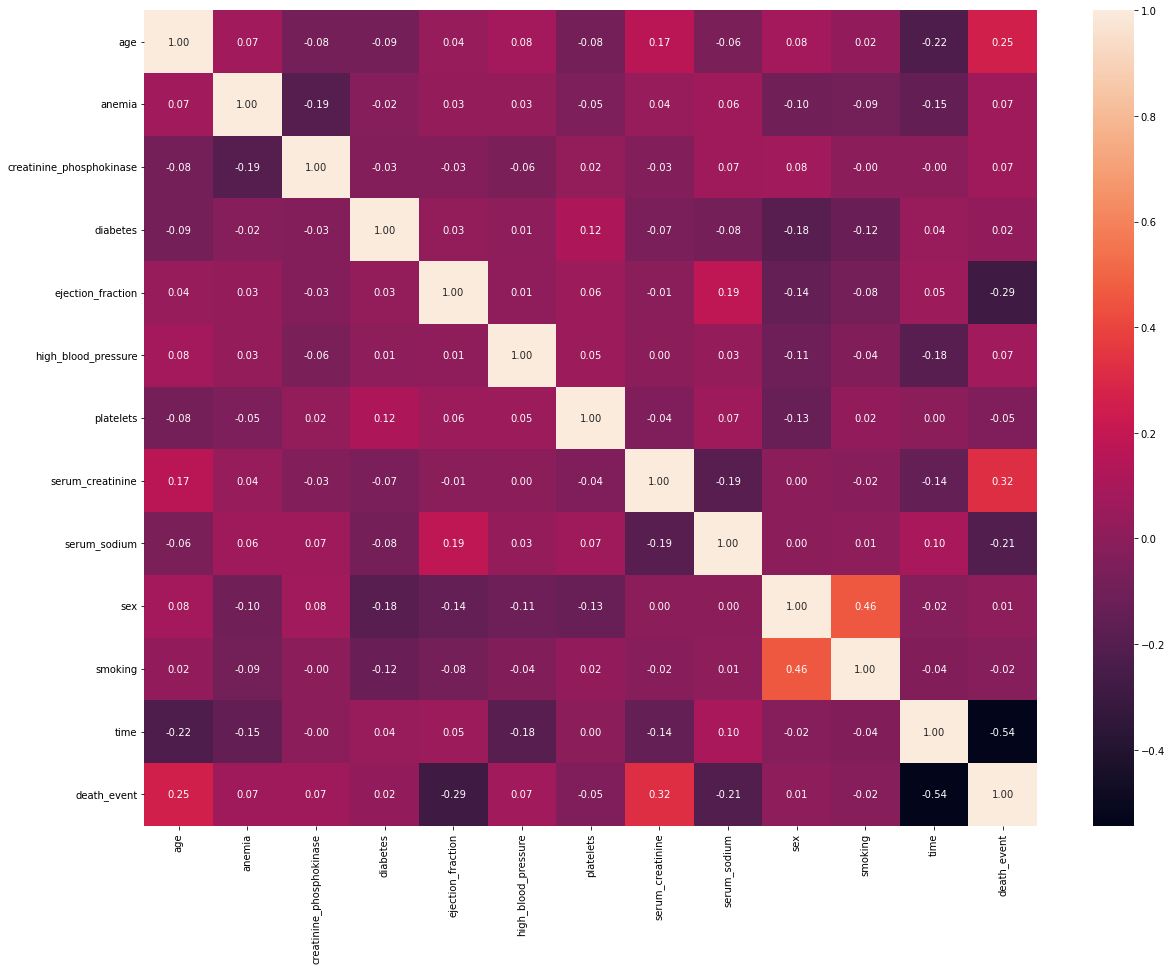

In [101]:
# Use heatmap for identifying correlation between numeric features
plt.figure(figsize=(20,15))
sns.heatmap(df_trts.corr(), annot=True, fmt='.2f')
plt.show()

Dari heatmap ini dapat terlihat banyak kolom yang mempunyai korelasi dengan 'death_event', namun beberapa kolom memiliki korelasi yang rendah. Beberapa kolom yang memiliki kolom rendah adalah anemia,creatinine_phospokinase, diabetes, high_blood_pressure, sex dan smoking.
Lanjut ke random forest classifier (feature importance) untuk mencari data pendukung tambahan untuk memutuskan apakah kolom ini akan di exclude.

In [102]:
#create classifier with n estimator = 100
featimpt = RandomForestClassifier(n_estimators= 100, random_state=15)

#fit to the data
featimpt.fit(X_train,y_train)

#simpan hasil dan buat menjadi dataframe
scorepercolumn = pd.Series(featimpt.feature_importances_, index = X_train.columns)
scorepercolumn.sort_values(ascending=False)

time                        0.329298
serum_creatinine            0.144378
ejection_fraction           0.115147
age                         0.098606
serum_sodium                0.085083
creatinine_phosphokinase    0.080945
platelets                   0.078869
anemia                      0.015902
smoking                     0.015784
diabetes                    0.012286
sex                         0.012249
high_blood_pressure         0.011455
dtype: float64

Ternyata beberapa feature yang dicurigai pada EDA: anemia, diabetes, high_blood_pressure, sex dan smoking benar memiliki feature importance yang rendah dan akan di exclude saat feature importance, sedangkan sisanya creatinine_phospokinase walau pada heat map terlihat tidak memiliki korelasi yang kuat ternyata didukung oleh EDA dan feature importance sehingga akan dimasukkan ke dalam feature selection.

In [103]:
#Keep only features that selected from previous analyzation
X_train_fs = X_train.loc[:,['age','creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine','serum_sodium', 'time']]
X_test_fs = X_test.loc[:,['age','creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine','serum_sodium', 'time']]
X_test_fs.head(3)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
64,40.0,101,40,226000.00,0.80,141,187
86,42.0,582,60,263358.03,1.18,137,82
258,51.0,78,50,406000.00,0.70,140,79


## Missing value handling

In [104]:
# Looking missing value in X_train
X_train_fs.isnull().sum().sum()

0

In [105]:
# Looking missing value in X_test
X_test_fs.isnull().sum().sum()

0

In [106]:
# Looking missing value in y_train
y_train.isnull().sum().sum()

0

In [107]:
# Looking missing value in y_test
y_test.isnull().sum().sum()

0

Tdiak ada missing value, selain itu setelah data dibandingkan dengan sumber data, tidak ada angka yang berada diluar range pada deskripsi dataset. Sehingga tidak ada data yang perlu diolah lebih lanjut sebagai missing value.

## Split between Numerical Columns and Categorical Columns

Data Splitting antara kolom kategori dan numerical dilakukan sebelum outlier untuk memudahkan outlier handling, baik dari sisi grafik dan pengihitungan outlier.

In [108]:
X_train_fs

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
254,72.0,127,50,218000.0,1.0,134,33
129,68.0,646,25,305000.0,2.1,130,108
36,55.0,582,35,371000.0,0.7,140,197
164,70.0,75,35,223000.0,2.7,138,54
187,40.0,624,35,301000.0,1.0,142,214
...,...,...,...,...,...,...,...
199,50.0,582,38,310000.0,1.9,135,35
155,70.0,232,30,173000.0,1.2,132,210
156,65.0,582,30,249000.0,1.3,136,212
133,65.0,395,25,265000.0,1.2,136,154


In [109]:
#Memilih feature numerical dan categorical
num_col = ['age','creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_sodium','time','serum_creatinine']

Semua kolom merupakan numerical data, sehingga tidak ada categori pada data ini. Lanjutkan sesuai prosedur numerical.

In [110]:
# Split data set sesuai dengan categorical dan numerical
X_train_num = X_train_fs[num_col]

X_test_num = X_test_fs[num_col]

In [111]:
#show Xtrain num
X_train_num.head(3)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_sodium,time,serum_creatinine
254,72.0,127,50,218000.0,134,33,1.0
129,68.0,646,25,305000.0,130,108,2.1
36,55.0,582,35,371000.0,140,197,0.7


## Outliers handling

In [112]:
# Membuat def fungsi untuk membuat histogram dan boxplot bagi numerical X_train 
def hist_boxplot(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print(variable)
    print('skewness:', df[variable].skew())
    if (df[variable].skew() <= -0.5 ) | (df[variable].skew() >= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

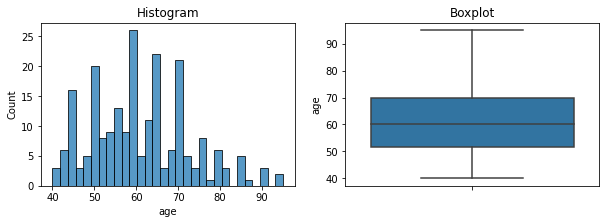

age
skewness: 0.4612140479613444
the distribution is normal


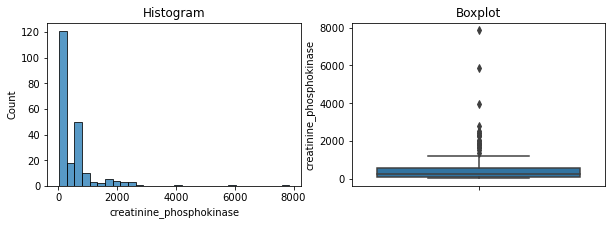

creatinine_phosphokinase
skewness: 4.799406145659865
the distribution is skewed


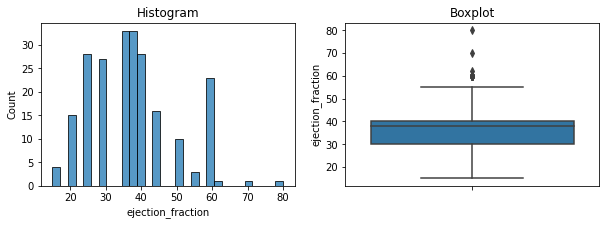

ejection_fraction
skewness: 0.6439749776097039
the distribution is skewed


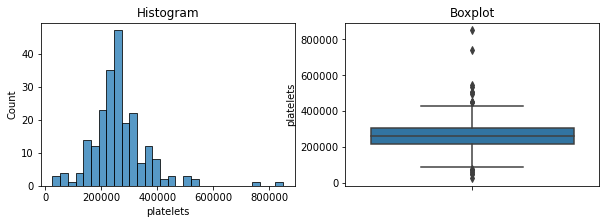

platelets
skewness: 1.571445482010016
the distribution is skewed


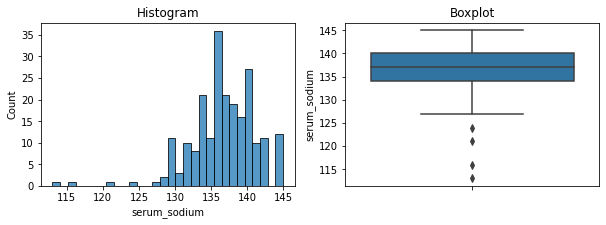

serum_sodium
skewness: -1.294109237100156
the distribution is skewed


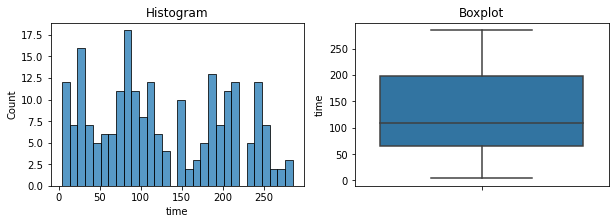

time
skewness: 0.20121519360838558
the distribution is normal


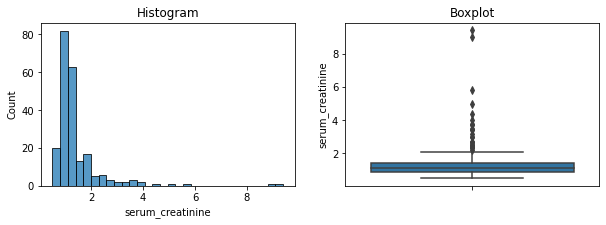

serum_creatinine
skewness: 4.4832864773996945
the distribution is skewed


In [113]:
#munculkan histogram dan boxplot bagi ketiga feature di X_Traim_num
for i in X_train_num.columns:
    hist_boxplot(X_train_num, i)

Semua data memiliki distribusi skewed, kecuali age dan time. Beberapa data menunjukkan adanya outlier (creatinine_phosphokinase,ejection_fraction,platelets,serum _creatinine dan serum_sodium) namun hal ini dianggap sebagai natural outlier karena masih dalam range yang memungkinkan (sesuai deskripsi masing-masing kolom pada sumber dataset) wajar jika terjadi outlier.

## Feature Scaling

Scaling akan dilakukan dengan menggunakan pipeline bersama encoding, menggunakan minmaxscaler dan standard scaler dikarenakan sebagian feature yang terdapat dalam numerik memiliki distribusi skewed dan sebagian lagi normal.

## Feature Encoding

Tidak ada kelompok data kategori maka proses encoding tidak dilakukan.

## Concate between Numerical Columns and Categorical Columns

In [114]:
#Satukan kedua dataset train dan test dari num dan category, karena tidak ada kategori maka dataset hanya akan di copy
X_train_fin = X_train_num.copy()
X_test_fin = X_test_num.copy()
X_train_num

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_sodium,time,serum_creatinine
254,72.0,127,50,218000.0,134,33,1.0
129,68.0,646,25,305000.0,130,108,2.1
36,55.0,582,35,371000.0,140,197,0.7
164,70.0,75,35,223000.0,138,54,2.7
187,40.0,624,35,301000.0,142,214,1.0
...,...,...,...,...,...,...,...
199,50.0,582,38,310000.0,135,35,1.9
155,70.0,232,30,173000.0,132,210,1.2
156,65.0,582,30,249000.0,136,212,1.3
133,65.0,395,25,265000.0,136,154,1.2


---
# 6. Model definition

Notes :

Algoritma yang akan dipakai adalah:
a. Random Forest

b. Boosting (Ada Boosting, & Gradient Bossting) (untuk membandingkan model boost mana yang akan diambil)

Note: Buatlah model Classification menggunakan Random Forest dan salah satu algoritma boosting.

Proses yang dilalui adalah cross validation untuk mencari algoritma base terbaik, lalu dilanjutkan dengan grid search untuk mencari hyperparameter terbaik. 

Dengan metrics yang akan dipakai untuk mengevaluasi adalah accuracy_score,classification_report untuk mengetahui recall, precision, dan nilai akurasi.

In [115]:
#state num dan cat cols, serta bagi cat cols menjadi ordinal dan nominal
num_skewcols = ['creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_sodium','serum_creatinine']
num_nomcols = ['age','time']

In [116]:
#persiapkan column transformer untuk membedakan proses per kolom
preprocess = ColumnTransformer([
    ('numskew', MinMaxScaler(),num_skewcols),
    ('catnom', StandardScaler(),num_nomcols)
])

In [117]:
#persiapkan pipeline RandomForestClassifier
prepmod_RF = Pipeline([
    ('preprop', preprocess),
    ('RFC', RandomForestClassifier())
    ])

In [118]:
##persiapkan pipeline AdaBoostClassifier
prepmod_AB = Pipeline([
    ('preprop', preprocess),
    ('AB', AdaBoostClassifier())
    ])

In [119]:
##persiapkan pipeline GradientBoostClassifier
prepmod_GB = Pipeline([
    ('preprop', preprocess),
    ('GB', GradientBoostingClassifier())
    ])

---
# 7. Model Training

Model training akan dilakukan sekalian dengan grid search.

---
# 8. Model Evaluation

In [120]:
#Matikan warnings
warnings.filterwarnings('ignore')

In [121]:
#buat dataframe untuk menampung hasil evaluasi
resulteval = pd.DataFrame(('RF','AB','GB'))
resulteval.rename(columns ={0:'model'},inplace=True)
resulteval['mean']=[0,0,0]
resulteval['stddev']=[0,0,0]
resulteval['acc_train']=[0,0,0]
resulteval['acc_test']=[0,0,0]
resulteval['train-test']=[0,0,0]
resulteval

,model,mean,stddev,acc_train,acc_test,train-test
0,RF,0,0,0,0,0
1,AB,0,0,0,0,0
2,GB,0,0,0,0,0


In [122]:
#Lakukan eval untuk RandomForest
a = np.mean(cross_val_score(prepmod_RF,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(prepmod_RF,X_train_fin,y_train,cv=10))

prepmod_RF.fit(X_train_fin,y_train)
train_acc = accuracy_score(y_train,prepmod_RF.predict(X_train_fin))
test_acc = accuracy_score(y_test,prepmod_RF.predict(X_test_fin))

resulteval.loc[0,'mean']=a
resulteval.loc[0,'stddev']=b
resulteval.loc[0,'acc_train']=train_acc
resulteval.loc[0,'acc_test']=test_acc
resulteval.loc[0,'train-test']=train_acc-test_acc

In [123]:
#Lakukan eval untuk AB
a = np.mean(cross_val_score(prepmod_AB,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(prepmod_AB,X_train_fin,y_train,cv=10))

prepmod_AB.fit(X_train_fin,y_train)
train_acc = accuracy_score(y_train,prepmod_AB.predict(X_train_fin))
test_acc = accuracy_score(y_test,prepmod_AB.predict(X_test_fin))

resulteval.loc[1,'mean']=a
resulteval.loc[1,'stddev']=b
resulteval.loc[1,'acc_train']=train_acc
resulteval.loc[1,'acc_test']=test_acc
resulteval.loc[1,'train-test']=train_acc-test_acc

In [124]:
#Lakukan eval untuk GB
a = np.mean(cross_val_score(prepmod_GB,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(prepmod_GB,X_train_fin,y_train,cv=10))

prepmod_GB.fit(X_train_fin,y_train)
train_acc = accuracy_score(y_train,prepmod_GB.predict(X_train_fin))
test_acc = accuracy_score(y_test,prepmod_GB.predict(X_test_fin))

resulteval.loc[2,'mean']=a
resulteval.loc[2,'stddev']=b
resulteval.loc[2,'acc_train']=train_acc
resulteval.loc[2,'acc_test']=test_acc
resulteval.loc[2,'train-test']=train_acc-test_acc

In [125]:
#tampilkan hasil evaluasi
resulteval

,model,mean,stddev,acc_train,acc_test,train-test
0,RF,0.848419,0.086844,1.000000,0.910714,0.089286
1,AB,0.812055,0.061801,0.973094,0.821429,0.151666
2,GB,0.821344,0.063050,1.000000,0.839286,0.160714


dilihat dari mean dan std dev setiap model, maka diambil keputusan bahwa model base terbaik adalah Random Forest dikarenakan mean yang tinggi serta std dev yang rendah menunjukkan performa yang baik serta menandakan bahwa model memiliki sifat robust yang baik. Selain itu perbedaan accuracy score train dan test pada RF juga adalah yang paling minimal, maka RF adalah model terbaik untuk dataset ini.

### Random Forest Base vs Best

In [126]:
#buat parameter grid bagi logreg
param_gridRFC = [{'RFC__n_estimators': [100,500,1000],
               'RFC__criterion': ['gini', 'entropy', 'log_loss'],
               'RFC__max_depth': [1, 2, 3],
               'RFC__random_state': [15,25,35]}]

parameter ini dipilih untuk mengetahui banyaknya estimator, criteria penilaian kualitas split, batasan kedalaman pohon (prunning), dan random state yang baik bagi dataset ini.

In [127]:
#buat grid search lalu fit
tune_RF = GridSearchCV(prepmod_RF, param_gridRFC, cv=5)
tune_RF.fit(X_train_fin,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['creatinine_phosphokinase',
                                                                          'ejection_fraction',
                                                                          'platelets',
                                                                          'serum_sodium',
                                                                          'serum_creatinine']),
                                                                        ('catnom',
                                                                         StandardScaler(),
                                                                         ['age',
                                

In [128]:
#Cari best estimator bagi grid search RF
print("Best estimator:\n{}".format(tune_RF.best_estimator_))

Best estimator:
Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets', 'serum_sodium',
                                                   'serum_creatinine']),
                                                 ('catnom', StandardScaler(),
                                                  ['age', 'time'])])),
                ('RFC', RandomForestClassifier(max_depth=3, random_state=35))])


In [129]:
#print best parameters dari Random Forest
print("Best parameters: {}".format(tune_RF.best_params_))

Best parameters: {'RFC__criterion': 'gini', 'RFC__max_depth': 3, 'RFC__n_estimators': 100, 'RFC__random_state': 35}


best parameter terbaik dari hasil grod search adalah sebagai berikut:'RFC__criterion': 'gini', 'RFC__max_depth': 3, 'RFC__n_estimators': 100, 'RFC__random_state': 35

In [130]:
#print grid score
print("Test-set score: {:.2f}".format(tune_RF.score(X_train_fin,y_train)))

Test-set score: 0.91


In [131]:
#lakukan predict menggunakan best parameter
y_train_predRF = tune_RF.best_estimator_.predict(X_train_fin)
y_test_predRF = tune_RF.best_estimator_.predict(X_test_fin)

In [132]:
#lakukan predict untuk base parameter
y_train_pred_baseRF = prepmod_RF.predict(X_train_fin)
y_test_pred_baseRF = prepmod_RF.predict(X_test_fin)

Bandingkan hasil accuracy score antara best parameter dengan base parameter

In [133]:
#print accuracy score best param
print('accuracy score train : ',accuracy_score(y_train,y_train_predRF))
print('accuracy score test : ',accuracy_score(y_test,y_test_predRF))

accuracy score train :  0.9103139013452914
accuracy score test :  0.9285714285714286


In [134]:
#print accuracy score base param best param
print('accuracy score train : ',accuracy_score(y_train,y_train_pred_baseRF))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred_baseRF))

accuracy score train :  1.0
accuracy score test :  0.9107142857142857


dari accuracy score terlihat bahwa best parameter memiliki akurasi yang jauh lebih baik dengan perbedaan atara train dan test lebih kecil dibanding base parameter.

Bandingkan hasil classification report antara best parameter dengan base parameter

In [135]:
#print classification report best param
print('Classification Report (RandomForestClassifier With Hyperparameter Tuning In Data Train)')
print('-----------------------------------------------------------------------------------\n')
print(classification_report(y_train,y_train_predRF))
print('-----------test-------------')
print('Classification Report (RandomForestClassifier With Hyperparameter Tuning In Data Test)')
print('-----------------------------------------------------------------------------------\n')
print(classification_report(y_test,y_test_predRF))

Classification Report (RandomForestClassifier With Hyperparameter Tuning In Data Train)
-----------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       144
           1       0.92      0.82      0.87        79

    accuracy                           0.91       223
   macro avg       0.91      0.89      0.90       223
weighted avg       0.91      0.91      0.91       223

-----------test-------------
Classification Report (RandomForestClassifier With Hyperparameter Tuning In Data Test)
-----------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.92      0.79      0.85        14

    accuracy                           0.93        56
   macro avg       0.92      0.88      0.90        56
weighted avg       0.93    

In [136]:
#print classification report base param
print('Classification Report (RandomForestClassifier Data Train)')
print('------------------------------------------------------\n')
print(classification_report(y_train,y_train_pred_baseRF))
print('Classification Report (RandomForestClassifier Data Test)')
print('------------------------------------------------------\n')
print(classification_report(y_test,y_test_pred_baseRF))

Classification Report (RandomForestClassifier Data Train)
------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00        79

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Classification Report (RandomForestClassifier Data Test)
------------------------------------------------------

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.80      0.86      0.83        14

    accuracy                           0.91        56
   macro avg       0.88      0.89      0.88        56
weighted avg       0.91      0.91      0.91        56



dari classification report juga terlihat bahwa best parameter memiliki nilai recall yang lebih robust dengan perbedaan antara train dan test lebih kecil dibanding base parameter. Recall dipilih agar model mampu memaksimalkan prediksi yang tepat dari data yang benar-benar positive, sehingga semakin banyak orang yang terdeteksi memiliki potensi meninggal jiwa diantara yang benar-benar memiliki potensi. 

### Gradient Boost Base vs Best

In [137]:
#buat parameter grid bagi logreg
param_gridGB = [{'GB__n_estimators': [100,500,1000],
               'GB__min_samples_split': [1, 2, 3],
               'GB__min_samples_leaf': [1, 2, 3],
               'GB__max_depth': [1, 2, 3],
               'GB__random_state': [15,25,35]}]

parameter ini dipilih untuk mengetahui banyaknya estimator, sample minimum untuk split, minimum sample leaf, batasan kedalaman pohon (prunning), dan random state yang baik bagi dataset ini.

In [138]:
#buat grid search lalu fit
tune_GB = GridSearchCV(prepmod_GB, param_gridGB, cv=5)
tune_GB.fit(X_train_fin,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['creatinine_phosphokinase',
                                                                          'ejection_fraction',
                                                                          'platelets',
                                                                          'serum_sodium',
                                                                          'serum_creatinine']),
                                                                        ('catnom',
                                                                         StandardScaler(),
                                                                         ['age',
                                

In [139]:
#Cari best estimator bagi grid search tadi
print("Best estimator:\n{}".format(tune_GB.best_estimator_))

Best estimator:
Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets', 'serum_sodium',
                                                   'serum_creatinine']),
                                                 ('catnom', StandardScaler(),
                                                  ['age', 'time'])])),
                ('GB',
                 GradientBoostingClassifier(max_depth=1, min_samples_leaf=2,
                                            random_state=15))])


In [140]:
#print best parameters dari Gradient Boosting
print("Best parameters: {}".format(tune_GB.best_params_))

Best parameters: {'GB__max_depth': 1, 'GB__min_samples_leaf': 2, 'GB__min_samples_split': 2, 'GB__n_estimators': 100, 'GB__random_state': 15}


best parameter terbaik dari hasil grod search adalah sebagai berikut: 'GB__max_depth': 1, 'GB__min_samples_leaf': 2, 'GB__min_samples_split': 2, 'GB__n_estimators': 100, 'GB__random_state': 15

In [141]:
#print grid score
print("Test-set score: {:.2f}".format(tune_GB.score(X_train_fin,y_train)))

Test-set score: 0.88


In [142]:
#lakukan predict menggunakan best parameter
y_train_predGB = tune_GB.best_estimator_.predict(X_train_fin)
y_test_predGB = tune_GB.best_estimator_.predict(X_test_fin)

In [143]:
#lakukan predict untuk base parameter
y_train_pred_baseGB = prepmod_GB.predict(X_train_fin)
y_test_pred_baseGB = prepmod_GB.predict(X_test_fin)

In [144]:
#print accuracy score best param
print('accuracy score train : ',accuracy_score(y_train,y_train_predGB))
print('accuracy score test : ',accuracy_score(y_test,y_test_predGB))

accuracy score train :  0.8834080717488789
accuracy score test :  0.9107142857142857


In [145]:
#print accuracy score base param best param
print('accuracy score train : ',accuracy_score(y_train,y_train_pred_baseGB))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred_baseGB))

accuracy score train :  1.0
accuracy score test :  0.8392857142857143


Kedua model Gradient Boosting (best parameter dan base parameter) menunjukkan overfit, sehingga tetap ambil random forest sebagai model terbaik.

In [146]:
#print classification report best param
print('Classification Report (Gradient Boost With Hyperparameter Tuning In Data Train)')
print('-----------------------------------------------------------------------------------\n')
print(classification_report(y_train,y_train_predGB))
print('Classification Report (Gradient Boost With Hyperparameter Tuning In Data Test)')
print('-----------------------------------------------------------------------------------\n')
print(classification_report(y_test,y_test_predGB))

Classification Report (Gradient Boost With Hyperparameter Tuning In Data Train)
-----------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       144
           1       0.90      0.76      0.82        79

    accuracy                           0.88       223
   macro avg       0.89      0.86      0.87       223
weighted avg       0.88      0.88      0.88       223

Classification Report (Gradient Boost With Hyperparameter Tuning In Data Test)
-----------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.80      0.86      0.83        14

    accuracy                           0.91        56
   macro avg       0.88      0.89      0.88        56
weighted avg       0.91      0.91      0.91        56



In [147]:
#print classification report base param
print('Classification Report (Gradient Boost Data Train)')
print('------------------------------------------------------\n')
print(classification_report(y_train,y_train_pred_baseGB))
print('Classification Report (Gradient Boost Data Test)')
print('-----------------------------------------------------------------------------------\n')
print(classification_report(y_test,y_test_pred_baseGB))

Classification Report (Gradient Boost Data Train)
------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00        79

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Classification Report (Gradient Boost Data Test)
-----------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        42
           1       0.65      0.79      0.71        14

    accuracy                           0.84        56
   macro avg       0.79      0.82      0.80        56
weighted avg       0.85      0.84      0.84        56



dari classification report juga terlihat bahwa best parameter memiliki nilai recall yang lebih robust dibanding base parameter namun best parameter malah memperburuk preforma recall pada train test. Recall dipilih agar model mampu memaksimalkan prediksi yang tepat dari data yang benar-benar positive, sehingga semakin banyak orang yang terdeteksi memiliki potensi meninggal jiwa diantara yang benar-benar memiliki potensi. Oleh karena itu penting memilih model dengan recall yang baik, yaitu Random Forest.

---
# 9. Model Inference

In [148]:
df_inf.head(3)

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,40.0,0,582,1,35,0,222000.0,1.0,132,1,0,244,0
1,53.0,0,196,0,60,0,220000.0,0.7,133,1,1,134,0
2,70.0,1,143,0,60,0,351000.0,1.3,137,0,0,90,1


In [149]:
df_inf_copy = df_inf.copy()

In [150]:
# Looking missing value in X_train
df_inf_copy.isnull().sum().sum()


0

In [151]:
#Lakukan predict pada data infers
y_inf_pred_bestRF = tune_RF.best_estimator_.predict(df_inf_copy)

y_inf_pred_bestGB = tune_GB.best_estimator_.predict(df_inf_copy)

In [155]:
# Create Dataframe columns=['defpayment_predicted'])
y_inf_pred_best_dfRF= pd.DataFrame(y_inf_pred_bestRF, columns=['death_event_predictedRandromForest'])
y_inf_pred_best_dfGB= pd.DataFrame(y_inf_pred_bestGB, columns=['death_event_predictedGradientBoost'])

# Concate between Inference-Set and Prediction
df_inf_bestparam = pd.concat([df_inf_copy, y_inf_pred_best_dfRF,y_inf_pred_best_dfGB], axis=1)
df_inf_bestparam.head(3)

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event,death_event_predictedRandromForest,death_event_predictedGradientBoost
0,40.0,0,582,1,35,0,222000.0,1.0,132,1,0,244,0,0,0
1,53.0,0,196,0,60,0,220000.0,0.7,133,1,1,134,0,0,0
2,70.0,1,143,0,60,0,351000.0,1.3,137,0,0,90,1,0,0


In [156]:
#compare prediction result and actual data
df_inf_bestparam[['death_event','death_event_predictedRandromForest','death_event_predictedGradientBoost']]

,death_event,death_event_predictedRandromForest,death_event_predictedGradientBoost
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,1
4,0,1,1
5,1,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


Dengan Random Forest best parameter 4 data dari 20 sample data mengalami salah prediksi (ketepatan prediksi 80%) sedangkan menggunakan GB dengan best parameter kesalahan prediksi pada data inference sebesar5 dari 20 sample (75%). Sehingga disimpulkan random forest memiliki performa yang lebih baik, dari train-test hingga inference dataset.

---
# 10. Pengambilan Kesimpulan

Kesimpulan:

Dari proses EDA ditemukan beberapa hal:
- Pada proses EDA ditemukan adanya data imbalance.
- Kolom-kolom yang memiliki potensi mempengaruhi potensi death event adalah: age,creatinine_phosphokinase, ejection_fraction,platelets,serum_creatinine,serum_sodium, dan time
- Kolom yang tidak memiliki potensi mempengaruhi death_event: anemia, diabetes, high_blood_pressure, sex dan smoking


Dari process feature selection:
- Heatmap: Dari heatmap yerlihat banyak kolom yang mempunyai korelasi dengan 'death event', namun beberapa kolom memiliki korelasi yang rendah. Beberapa kolom itu adalah anemia,creatinine_phosphokinase, diabetes, platelets, high_blood_pressure, sex dan smoking.
- Feature importance: menunjukkan hasil yang sama dengan hasil EDA yaitu age,creatinine_phosphokinase, ejection_fraction,platelets,serum_creatinine,serum_sodium, dan time memiliki korelasi yang kuat terhadap death_event

Dari process outliers handling:
- Semua feature yang digunakan merupakan numerical column yang memiliki distribusi skewed, kecuali age dan time yang distribusinya normal.
- Beberapa data menunjukkan adanya outlier (creatinine_phosphokinase,ejection_fraction,platelets,serum _creatinine dan serum_sodium) namun hal ini dianggap sebagai natural outlier karena masih dalam range yang memungkinkan (sesuai deskripsi masing-masing kolom pada sumber dataset) wajar jika terjadi outlier


Dari proses model evaluation dan analysis didapatkan:
- Dilihat dari mean dan std dev model Random Forest dan Gradient Boosting, maka diambil keputusan bahwa model base terbaik adalah Random Forest. Selain itu perbedaan accuracy score train dan test pada RF juga adalah yang paling minimal, maka RF adalah model terbaik untuk dataset ini.
- Dari hasil perbandingan RF base dan best parameter didapatkan best parameter memiliki akurasi yang jauh lebih baik dengan perbedaan atara train dan test lebih kecil dibanding base parameter. Serta best parameter memiliki nilai recall yang lebih robust dengan perbedaan antara train dan test lebih kecil dibanding base parameter.
- Dari hasil perbandingan GB base dan best parameter didapatkan kedua model Gradient Boosting (best parameter dan base parameter) menunjukkan overfit. Classification report juga menunjukkan bahwa best parameter memiliki nilai recall yang lebih robust dibanding base parameter namun best parameter malah memperburuk performa recall pada train test.
- Dengan tujuan meningkatkan recall maka Random Forest dipilih sebagai model terbaik.

Hasil dari data inference
- Dengan Random Forest best parameter 4 data dari 20 sample data mengalami salah prediksi (ketepatan prediksi 80%) sedangkan menggunakan GB dengan best parameter kesalahan prediksi pada data inference sebesar5 dari 20 sample (75%). Sehingga disimpulkan random forest memiliki performa yang lebih baik, dari train-test hingga inference dataset.

Untuk pengembangan selanjutnya, memperbaiki model untuk meningkatkan nilai Accuracy Score Train dan Accuracy Score Test dengan:
- Menangani data imbalance
- Menambah atau mengurangi feature
- Mencoba parameter lain.
- Mencoba model lainnya yang belum dicoba.


### CONCEPTUAL PROBLEM

Jawab pertanyaan berikut:

Apakah yang dimaksud dengan Bagging?

- Bagging, juga dikenal sebagai bootstrap aggregating yang merupakan agregasi dari beberapa versi dari model yang diprediksi.
Boostrap aggregating ini memiliki fungsi untuk memperkecil kemungkinan overfir karena set data pelatihan yang berbeda digunakan dalam model, model menjadi tangguh untuk menghindari kesalahan, dan oleh karena itu modek akan memiliki kinerja baik terjadap data uji, dan dengan demikian mengurangi varians dengan mempertahankan dasar yang kuat selama mempelajari data uji. Pengujian dengan data set yang berbeda (variasi yang berbeda) akan membuat model tidak mudah menjadi bias terhadap solusi yang salah.


Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?
- Random Forest prosesnya dilakukan secara paralel (termasuk bagging), dimana setiap model individual dibangun secara parallel dan seluruh model berbeda satu dengan lainnya. Satu model akan digunakan untuk membangun satu model random forest berbeda. Setelah training selesai dan dilakukan predict maka voting akan dilakukan untuk menentukan prediksi target final.

- Sedangkan gradien boosting termasuk ke bagian boosting pada ensemble methods. Dimana individual model dibangun secara berurutan (seri). yang artinya output model satu akan menjadi input model selanjutnya. Hal ini dimaksudkan untuk memperbaiki eror pada model sebelumnya di model yang sedang berjalan, begitu seterusnya hingga eror nya berkurang drastis. Hal ini tidak terjadi pada bagging, bagging tidak mendapat input mengenai eror pada model lainnya. Selanjutnya dalam pengambilan keputusan mengenai prediksi final, boosting melakukan pembebanan dengan berat paling besar dimiliki oleh model dan hasil prediksi yang akurat (berdasarkan train).

sumber:https://dataaspirant.com/ensemble-methods-bagging-vs-boosting-difference/